Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


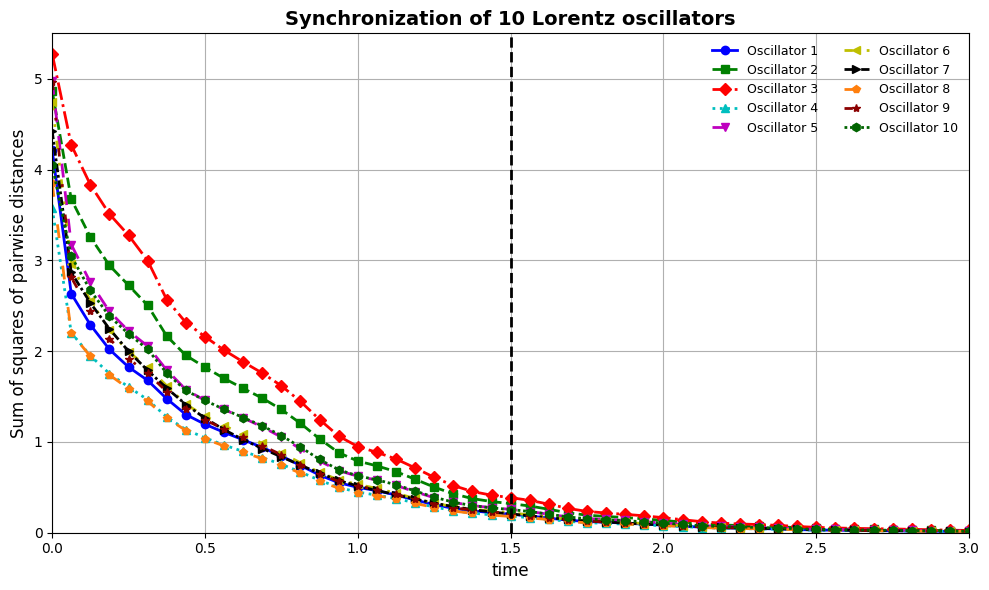

In [16]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# ===== File path to sync_data.xlsx =====
file_path = '/content/drive/My Drive/synchronization_data.xlsx'  # Adjust if needed

# ===== Load data =====
df = pd.read_excel(file_path, sheet_name=0)

# Drop completely empty rows (if any) just in case
df = df.dropna(how='all')

# Load t from column A, starting from row 2 until data ends
t = df.iloc[0:, 0].to_numpy()

# Load E from columns B:K, starting from row 2, transpose so rows = oscillators
E = df.iloc[0:, 1:11].to_numpy().T

# ===== Plot =====
fig, ax = plt.subplots(figsize=(10, 6))

# Style combinations
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF7F0E', '#8B0000', '#006400']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']
linestyles = ['-', '--', '-.', ':', (0, (5, 5)), (0, (3, 5, 1, 5)),
              (0, (3, 1, 1, 1)), (0, (5, 10)), (0, (3, 10, 1, 10)), (0, (1, 1))]

# Plot each oscillator's data
for i in range(E.shape[0]):
    ax.plot(
        t, E[i],
        label=f'Oscillator {i+1}',
        color=colors[i % len(colors)],
        marker=markers[i % len(markers)],
        linestyle=linestyles[i % len(linestyles)],
        linewidth=2,
        markersize=6
    )

# ===== Labels and formatting =====
ax.set_xlabel("time", fontsize=12)
ax.set_ylabel("Sum of squares of pairwise distances", fontsize=12)
ax.set_title("Synchronization of 10 Lorentz oscillators", fontsize=14, fontweight='bold')

# Add vertical dashed black line at x = 1.5
ax.axvline(x=1.5, color='black', linestyle='--', linewidth=2)

ax.legend(fontsize=9, loc='upper right', frameon=False, ncol=2)
ax.grid(True)

plt.xlim(0,3)
plt.ylim(0,5.5)
plt.tight_layout()
plt.show()

In [10]:
t

array([0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375, 0.5   ,
       0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375, 1.    ,
       1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375, 1.5   ,
       1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375, 2.    ,
       2.0625, 2.125 , 2.1875, 2.25  , 2.3125, 2.375 , 2.4375, 2.5   ,
       2.5625, 2.625 , 2.6875, 2.75  , 2.8125, 2.875 , 2.9375, 3.    ])